# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_Parameters_Tuning"

/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_Parameters_Tuning


/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset_np # type: ignore
from GMetrics.utils import se_mean, se_std
from GMetrics.metrics.NPLM import candidate_sigma

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2025-03-03 13:16:08.698012: Importing os...
2025-03-03 13:16:08.698133: Importing sys...
Visible devices: [0]
2025-03-03 13:16:08.698361: Importing timer from timeit...
2025-03-03 13:16:08.698428: Setting env variables for tf import (only device(s) [0] will be available)...
2025-03-03 13:16:08.698552: Importing numpy...
2025-03-03 13:16:09.012688: Importing matplotlib...
2025-03-03 13:16:09.475281: Importing h5py...
2025-03-03 13:16:09.733156: Importing importlib.util...
2025-03-03 13:16:09.733291: Importing json...
2025-03-03 13:16:09.733356: Importing pandas...
2025-03-03 13:16:10.768374: Importing random...
2025-03-03 13:16:10.768563: Importing scipy utils...
2025-03-03 13:16:11.721182: Importing subprocess...
2025-03-03 13:16:11.721321: Importing textwrap...
2025-03-03 13:16:11.721382: Importing tensorflow...
Tensorflow version: 2.16.1
2025-03-03 13:16:21.196260: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2025-03-03 13:16:22.478572: Importing timeit.

/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2025-03-03 13:16:34.063037: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
2025-03-03 13:16:34.092013: All done.


# Model definition

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


## Init data

In [6]:
results_dir = "results/jet_features/"

In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_jet_features(jet_features):
    p_T_jet = jet_features[:,1]
    eta_jet = jet_features[:,2]
    m_jet = jet_features[:,3]
    m_jet_over_p_T_jet = m_jet / p_T_jet
    return tf.stack([p_T_jet, eta_jet, m_jet, m_jet_over_p_T_jet], axis=1)

jet_features_reduced = get_reduced_jet_features(jet_features)
jet_features_reduced.shape

TensorShape([177252, 4])

# TwoSample Test

In [8]:
tests_dir = os.path.join(results_dir, "tests/")
model_dir = os.path.join(tests_dir, '10K_preprocessed/')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory {model_dir} has been created")
else:
    print(f"Directory {model_dir} already exists")

jet_features_reduced = get_reduced_jet_features(jet_features)

mean = tf.reduce_mean(jet_features_reduced, axis=0)
std = tf.math.reduce_std(jet_features_reduced, axis=0)
    
dataset = preprocess_data(jet_features_reduced, mean, std)

Directory results/jet_features/tests/10K_preprocessed/ already exists


## Bootstrapping Null Hypothesis

In [9]:
null_hypotheses_dir = os.path.join(model_dir, 'null_hypotheses/')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
    print(f"Directory {null_hypotheses_dir} has been created")
else:
    print(f"Directory {null_hypotheses_dir} already exists")
    
metrics_config_file = os.path.join(model_dir, "metrics_config.json")

Directory results/jet_features/tests/10K_preprocessed/null_hypotheses/ already exists


In [10]:
niter_tot = 24
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)

niter: 8, nbootstrap: 3
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.


In [11]:
flk_sigma = candidate_sigma(dist_1_null, perc = 90)  

Finite Dataset Case.
The Gaussian kernel sigma is estimated as the 90th percentile of the pairwise distance among 10000 points extracted from the reference data. 
The value of sigma is: 4.2


## Lambda Times

In [12]:
lam_list = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]

nplm_objects = {}

for i, lam in enumerate(lam_list):
    nplm_objects[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputsNull,
                                      progress_bar = True,
                                      verbose = True,
                                      M = 1000, 
                                      lam = lam, 
                                      iter_list = 1000000,
                                      flk_sigma = flk_sigma,
                                      weight = 1)
    print(f"lam value for NPLMMetric_{i} is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")

print(nplm_objects)

lam value for NPLMMetric_0 is: 1e-06
lam value for NPLMMetric_1 is: 1e-07
lam value for NPLMMetric_2 is: 1e-08
lam value for NPLMMetric_3 is: 1e-09
lam value for NPLMMetric_4 is: 1e-10
lam value for NPLMMetric_5 is: 1e-11
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98aef86f10>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98af14f690>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98aef8b190>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98aef8bf10>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98aeee3cd0>, 'NPLMMetric_5': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98aef892d0>}


In [13]:
name = "nplm"
file = null_hypotheses_dir + f"Computing_time_vs_lambda.json"

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [entry["lambda"] for entry in results]
    lam_list = np.array(lam_list)
    null_hp_times = [entry["computing_time"] for entry in results]
    null_hp_times = np.array(null_hp_times)
    metric_values = [entry["metric_list"] for entry in results]
    metric_values = np.array(metric_values)

    for i in range(len(lam_list)):
        print(f"For lambda = {lam_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[i]} s.")
        
else:
    results = []
    metric_values = np.zeros((len(lam_list), niter))
    null_hp_times = np.zeros(len(lam_list))  

    
    for i in range(len(lam_list)):
        start = timer()
        print(f"Computing and saving {name} for λ = {lam_list[i]}")
        print("\n===========================================================")

        all_test_statistics = []  # Temporary list to collect statistics for this lambda
        
        for j in range(nbootstrap):  # Loop over all bootstrap iterations
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed=1000 * j + j)  # Shuffle dataset for null hypothesis
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter * batch_size_test]
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter * batch_size_test]
            print(f"Testing from {j * niter} to {(j + 1) * niter} of {niter * nbootstrap} samples.")
            nplm_objects[f"NPLMMetric_{i}"].Test_np()
            del dstmp

            # Collect test statistics from this bootstrap iteration
            stats = nplm_objects[f"NPLMMetric_{i}"].test_statistics_values[:niter]
            assert len(stats) == niter, "Unexpected number of test statistics values returned."
            all_test_statistics.append(stats)

        # Flatten the list of statistics into a single array
        all_test_statistics = np.concatenate(all_test_statistics)
        assert len(all_test_statistics) == niter * nbootstrap, "Incorrect total number of test statistics collected."

        end = timer()
        print(f"All done for λ = {lam_list[i]} in: {end - start:.2f} s.")
        null_hp_times[i] = end - start  # Save the time for this M
        results.append({
            "lambda": lam_list[i],
            "computing_time": null_hp_times[i],
            "metric_list": all_test_statistics.tolist()  # Save as a list for JSON serialization
        })

    # Save results to file
    with open(file, "w") as f:
        json.dump(results, f, indent=4)

File results/jet_features/tests/10K_preprocessed/null_hypotheses/Computing_time_vs_lambda.json already exists. Loading existing results.
For lambda = 1e-06, the null hypothesis for 8 points has been calculated in 4.398968475870788 s.
For lambda = 1e-07, the null hypothesis for 8 points has been calculated in 4.347831716295332 s.
For lambda = 1e-08, the null hypothesis for 8 points has been calculated in 8.229500179644674 s.
For lambda = 1e-09, the null hypothesis for 8 points has been calculated in 19.7018949133344 s.
For lambda = 1e-10, the null hypothesis for 8 points has been calculated in 65.69283099099994 s.
For lambda = 1e-11, the null hypothesis for 8 points has been calculated in 286.28085306705907 s.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


File results/jet_features/tests/10K_preprocessed/null_hypotheses/Computing_time_vs_lambda.json already exists. Loading existing results.
[ 0.18329035  0.18115965  0.34289584  0.82091229  2.73720129 11.92836888]


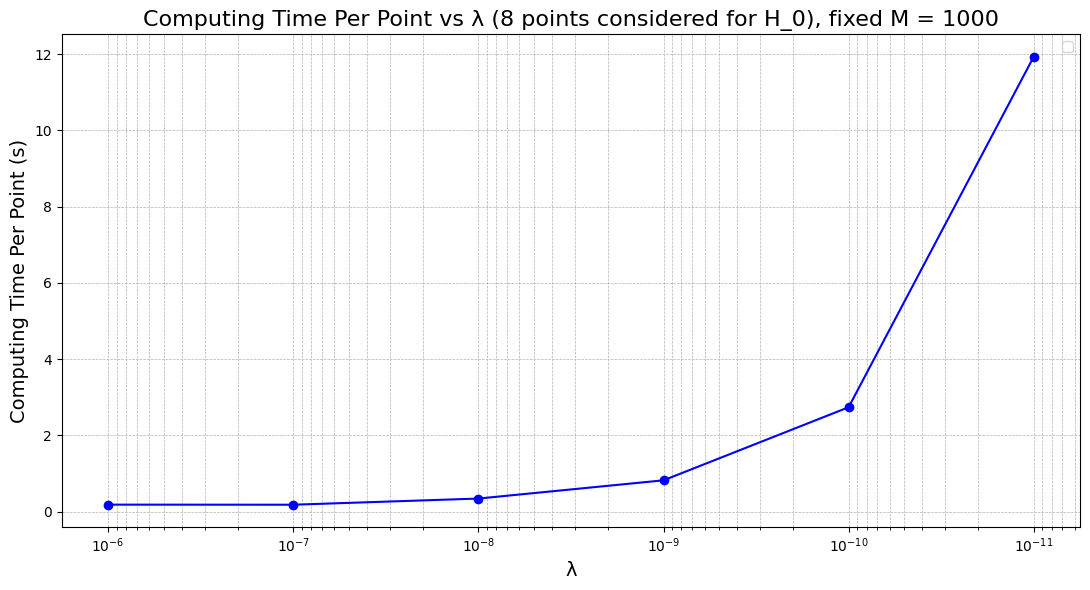

In [21]:
file = null_hypotheses_dir + f"Computing_time_vs_lambda.json"

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [entry["lambda"] for entry in results]
    lam_list = np.array(lam_list)
    null_hp_times = [entry["computing_time"] for entry in results]
    null_hp_times = np.array(null_hp_times)
    metric_values = [entry["metric_list"] for entry in results]
    metric_values = np.array(metric_values)

else:
    print("The files does not exists.")

null_hp_times_per_point = null_hp_times/(niter*nbootstrap)
print(null_hp_times_per_point)

plt.figure(figsize=(11, 6))
plt.plot(lam_list, null_hp_times_per_point, marker='o', linestyle='-', color = 'b')

plt.xscale('log')  
plt.xlabel("λ", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"Computing Time Per Point vs λ ({niter} points considered for H_0), fixed M = 1000", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.gca().invert_xaxis()

plt.savefig(null_hypotheses_dir+"Computing_time_vs_lambda.pdf", format="pdf")
plt.show()  

# Look times for fixed lambda and different M

In [19]:
lam_list = [1e-7, 1e-8, 1e-9]
M_list = [500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]

nplm_objects_M_lam = {}

for i, lam_value in enumerate(lam_list):
    for j, M_value in enumerate(M_list):
        nplm_objects_M_lam[f"NPLMMetric_{i,j}"] = GMetrics.NPLMMetric(TwoSampleTestInputsNull,
                                                progress_bar = True,
                                                verbose = True,
                                                M = M_value, 
                                                lam = lam_value, 
                                                iter_list = 1000000,
                                                flk_sigma = flk_sigma,
                                                weight = 1)
        print(f"(M,lam) values for NPLMMetric_{i,j} are: ({nplm_objects_M_lam[f'NPLMMetric_{i,j}'].nplm_kwargs.get('M')},{nplm_objects_M_lam[f'NPLMMetric_{i,j}'].nplm_kwargs.get('lam')})")

print(nplm_objects_M_lam)

(M,lam) values for NPLMMetric_(0, 0) are: (500,1e-07)
(M,lam) values for NPLMMetric_(0, 1) are: (750,1e-07)
(M,lam) values for NPLMMetric_(0, 2) are: (1000,1e-07)
(M,lam) values for NPLMMetric_(0, 3) are: (2000,1e-07)
(M,lam) values for NPLMMetric_(0, 4) are: (3000,1e-07)
(M,lam) values for NPLMMetric_(0, 5) are: (4000,1e-07)
(M,lam) values for NPLMMetric_(0, 6) are: (5000,1e-07)
(M,lam) values for NPLMMetric_(0, 7) are: (6000,1e-07)
(M,lam) values for NPLMMetric_(0, 8) are: (7000,1e-07)
(M,lam) values for NPLMMetric_(0, 9) are: (8000,1e-07)
(M,lam) values for NPLMMetric_(0, 10) are: (9000,1e-07)
(M,lam) values for NPLMMetric_(0, 11) are: (10000,1e-07)
(M,lam) values for NPLMMetric_(0, 12) are: (11000,1e-07)
(M,lam) values for NPLMMetric_(0, 13) are: (12000,1e-07)
(M,lam) values for NPLMMetric_(0, 14) are: (13000,1e-07)
(M,lam) values for NPLMMetric_(0, 15) are: (14000,1e-07)
(M,lam) values for NPLMMetric_(0, 16) are: (15000,1e-07)
(M,lam) values for NPLMMetric_(0, 17) are: (16000,1e-0

In [20]:
name = "nplm"
file = null_hypotheses_dir + f"test_statistic_fluc_M_lam.json"

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [lam for result in results for lam in result["lam"].keys()]
    M_list = [item["M"] for item in results[0]["lam"][lam_list[0]]]
    for i, result in enumerate(results):
        for lam, lam_data in result["lam"].items():
            for j, M_data in enumerate(lam_data):  # For each M value in the lambda
            
                null_hp_times[i, j] = M_data["computing_time"]
                metric_values[i, j] = M_data["metric_list"]
    
    for i in range(len(lam_list)):       
        for j in range(len(M_list)):
            print(f"For λ={lam_list[i]} and M = {M_list[j]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[i,j]} s.")
        
else:
    results = []
    metric_values = np.zeros((len(lam_list), len(M_list), niter * nbootstrap))
    null_hp_times = np.zeros((len(lam_list), len(M_list)))   

    for i in range(len(lam_list)):
        results.append({"lam": {}})
        
        for j in range(len(M_list)):
            start = timer()
            print(f"Computing and saving {name}")
            print("\n===========================================================")

            all_test_statistics = []  # Temporary list to collect statistics for this lambda
            
            for k in range(nbootstrap):  # Loop over all bootstrap iterations
                l = len(dataset) // 2
                dstmp = shuffle_dataset(seed=1000 * k + k)  # Shuffle dataset for null hypothesis
                dist_1_null = tf.cast(dstmp[:l], tf.float64)
                dist_2_null = tf.cast(dstmp[l:], tf.float64)
                TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter * batch_size_test]
                TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter * batch_size_test]
                print(f"Testing from {k * niter} to {(k + 1) * niter} of {niter * nbootstrap} samples.")
                nplm_objects_M_lam[f"NPLMMetric_{i,j}"].Test_np()
                del dstmp

                # Collect test statistics from this bootstrap iteration
                stats = nplm_objects_M_lam[f"NPLMMetric_{i,j}"].test_statistics_values[:niter]
                assert len(stats) == niter, "Unexpected number of test statistics values returned."
                all_test_statistics.append(stats)

            # Flatten the list of statistics into a single array
            all_test_statistics = np.concatenate(all_test_statistics)
            assert len(all_test_statistics) == niter * nbootstrap, "Incorrect total number of test statistics collected."

            end = timer()
            print(f"All done for λ = {lam_list[i]} in: {end - start:.2f} s.")
            null_hp_times[i,j] = end - start  # Save the time for this M
            metric_values[i, j] = all_test_statistics
            
            if lam_list[i] not in results[i]["lam"]:
                results[i]["lam"][lam_list[i]] = [] 
            
            # Append the new data for the current M value
            results[i]["lam"][lam_list[i]].append({
                "M": M_list[j],
                "computing_time": null_hp_times[i, j],
                "metric_list": metric_values[i, j].tolist()
            })

    # Save results to file
    with open(file, "w") as f:
        json.dump(results, f, indent=4)

File results/jet_features/tests/10K_preprocessed/null_hypotheses/test_statistic_fluc_M_lam.json already exists. Loading existing results.
For λ=1e-07 and M = 500, the null hypothesis for 8 points has been calculated in 17.033726416062564 s.
For λ=1e-07 and M = 750, the null hypothesis for 8 points has been calculated in 14.139373556245118 s.
For λ=1e-07 and M = 1000, the null hypothesis for 8 points has been calculated in 13.758321108762175 s.
For λ=1e-07 and M = 2000, the null hypothesis for 8 points has been calculated in 15.317708687856793 s.
For λ=1e-07 and M = 3000, the null hypothesis for 8 points has been calculated in 19.148537102155387 s.
For λ=1e-07 and M = 4000, the null hypothesis for 8 points has been calculated in 22.757123592775315 s.
For λ=1e-07 and M = 5000, the null hypothesis for 8 points has been calculated in 29.26047166995704 s.
For λ=1e-07 and M = 6000, the null hypothesis for 8 points has been calculated in 33.15712534170598 s.
For λ=1e-07 and M = 7000, the null

File results/jet_features/tests/10K_preprocessed/null_hypotheses/test_statistic_fluc_M_lam.json already exists. Loading existing results.


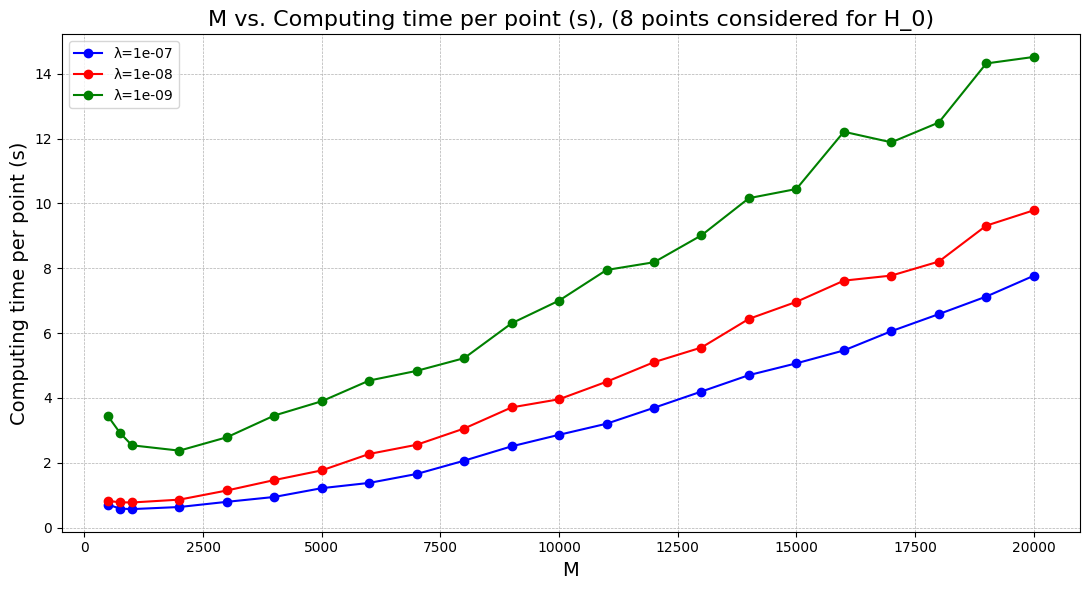

In [22]:
file = null_hypotheses_dir + f"test_statistic_fluc_M_lam.json"

null_hp_times = np.zeros((len(lam_list), len(M_list)))
metric_values = np.zeros((len(lam_list), len(M_list), niter * nbootstrap))

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [lam for result in results for lam in result["lam"].keys()]
    lam_list = np.array(lam_list)
    M_list = [item["M"] for item in results[0]["lam"][lam_list[0]]]
    for i, result in enumerate(results):
        for lam, lam_data in result["lam"].items():
            for j, M_data in enumerate(lam_data):  # For each M value in the lambda
            
                null_hp_times[i, j] = M_data["computing_time"]
                metric_values[i, j] = M_data["metric_list"]
                null_hp_times = np.array(null_hp_times)
                metric_values = np.array(metric_values)
                
else:
    print("file does not exist")
    

color_list = ['b','r','g']
label_list = [f'λ={lam}' for lam in lam_list]


plt.figure(figsize=(11, 6))
for i in range(len(lam_list)):
    plt.errorbar(M_list, null_hp_times[i]/(niter*nbootstrap),  capsize=5 ,marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Computing time per point (s)", fontsize=14)
plt.title(f"M vs. Computing time per point (s), ({niter} points considered for H_0)", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.savefig(null_hypotheses_dir+"Computing_time_vs_M.pdf", format="pdf")
plt.show()


File results/jet_features/tests/10K_preprocessed/null_hypotheses/test_statistic_fluc_M_lam.json already exists. Loading existing results.
Average test statistic values for lambda = 1e-07 varying M: [127.38301033 127.80856768 127.98403749 128.45036691 128.55630326
 128.63478738 128.65027495 128.69948856 128.71182447 128.7269562
 128.7307702  128.72697423 128.7200786  128.73215149 128.70929811
 128.69768873 128.67550974 128.66273496 128.65223788 128.6831567
 128.71015346 128.71503951]
 with std: [17.43440881 17.55421512 17.57188345 17.71149154 17.73924399 17.7823355
 17.77183009 17.77081401 17.76641912 17.77454647 17.80304093 17.80392233
 17.80947636 17.81557731 17.81804137 17.82610324 17.80917965 17.81982926
 17.8287094  17.8353371  17.8324831  17.82305144]
Average test statistic values for lambda = 1e-08 varying M: [173.89425196 175.11708715 175.63883647 176.75190436 177.06208781
 177.30056677 177.40699646 177.47491348 177.53777058 177.56772242
 177.57866835 177.60298819 177.59900671 1

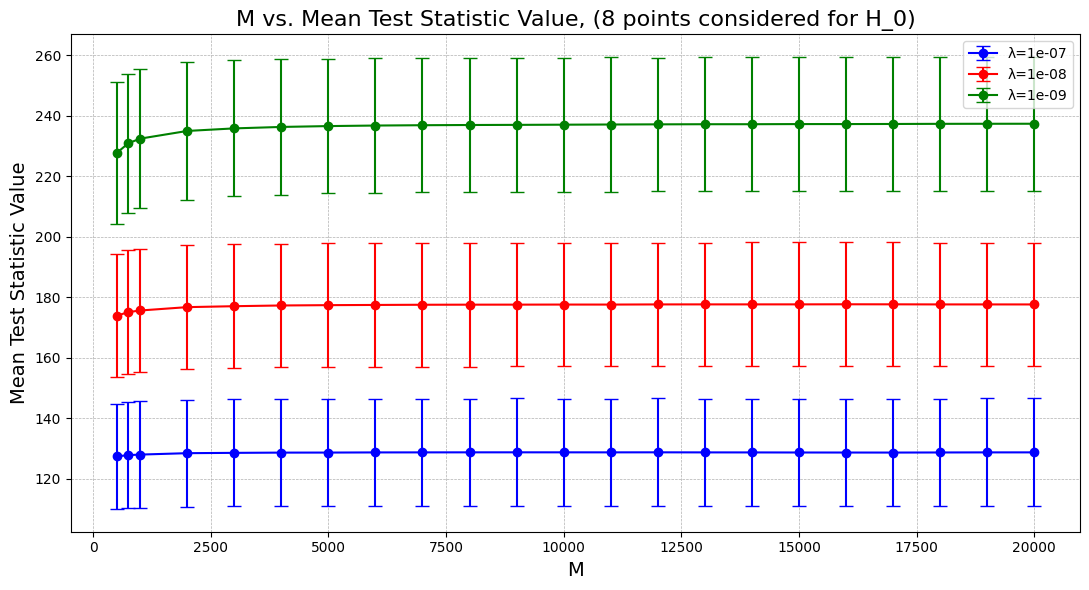

In [18]:
file = null_hypotheses_dir + f"test_statistic_fluc_M_lam.json"

null_hp_times = np.zeros((len(lam_list), len(M_list)))
metric_values = np.zeros((len(lam_list), len(M_list), niter * nbootstrap))

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [lam for result in results for lam in result["lam"].keys()]
    lam_list = np.array(lam_list)
    M_list = [item["M"] for item in results[0]["lam"][lam_list[0]]]
    for i, result in enumerate(results):
        for lam, lam_data in result["lam"].items():
            for j, M_data in enumerate(lam_data):  # For each M value in the lambda
            
                null_hp_times[i, j] = M_data["computing_time"]
                metric_values[i, j] = M_data["metric_list"]
                null_hp_times = np.array(null_hp_times)
                metric_values = np.array(metric_values)
                
else:
    print("file does not exist")
    

color_list = ['b','r','g']
label_list = [f'λ={lam}' for lam in lam_list]

avg_test_stat = np.zeros((len(lam_list), len(M_list)))
std_test_stat = np.zeros((len(lam_list), len(M_list)))

for i, lam in enumerate(lam_list):
    for j, m in enumerate(M_list):
        avg_test_stat[i,j] = (np.mean(metric_values[i,j]))
        std_test_stat[i,j] = (np.std(metric_values[i,j]))
    print(f"Average test statistic values for lambda = {lam} varying M: {avg_test_stat[i]}\n"
          f" with std: {std_test_stat[i]}")

plt.figure(figsize=(11, 6))
for i in range(len(lam_list)):
    plt.errorbar(M_list, avg_test_stat[i], std_test_stat[i], capsize=5 ,marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Mean Test Statistic Value", fontsize=14)
plt.title(f"M vs. Mean Test Statistic Value, ({niter} points considered for H_0)", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.savefig(null_hypotheses_dir+"Test_statistic_fluc_vs_M.pdf", format="pdf")
plt.show()
